> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I choose to study is the TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> There are two questions I want to address.
<br>
> The first one is Which genres are most popular from year to year? 
<br>
> The second one is What kinds of properties are associated with movies that have high revenues?

**Import all packages in need**

In [1]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats,integrate
import seaborn as sns
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

**Load the dataset and check the dimmension**

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv("tmdb-movies.csv")   #use pandas build_in function read_csv it can take different data type in columns
#print row and column numbers
print "This TMDB movie dataset has {0} rows and {1} columns.".format(len(movie_df),len(movie_df.iloc[0,]))   

This TMDB movie dataset has 10866 rows and 21 columns.


**Check the basic information of this dataset**

In [14]:
movie_df.info()   #the basic infomation of this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Check the first five rows of this dataset**

In [6]:
movie_df.head()  # check the first five rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Check the basic statistic of variables in this dataset**

In [19]:
movie_df.describe() #stat of numeric data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

**Check a subset of dataframe with "popularity" and "genres"**

In [3]:
# To extrat information from certain column
sub_df = movie_df[["popularity","genres"]]
sub_df.head()

,popularity,genres
0,32.985763,Action|Adventure|Science Fiction|Thriller
1,28.419936,Action|Adventure|Science Fiction|Thriller
2,13.112507,Adventure|Science Fiction|Thriller
3,11.173104,Action|Adventure|Science Fiction|Fantasy
4,9.335014,Action|Crime|Thriller


**Check how many rows in this sub_dataset**

In [4]:
sub_df1=sub_df.dropna()   
print "This sub dataset has {} rows.".format(len(movie_df))   

This sub dataset has 10866 rows.


**Check how many genres in total and what are they**

In [5]:
#check how many genres in total and what are they
temps = sub_df1['genres'].str.split('|')
let=set()
for temp in temps:
    for s in temp:
        let.add(s)
print len(let), let

20 set(['Mystery', 'Romance', 'History', 'Family', 'Fantasy', 'Horror', 'Crime', 'Drama', 'Science Fiction', 'Animation', 'Music', 'Adventure', 'Foreign', 'Action', 'TV Movie', 'Comedy', 'Documentary', 'War', 'Thriller', 'Western'])


**Check the distribution of "popularity", plot in both raw and log scale**

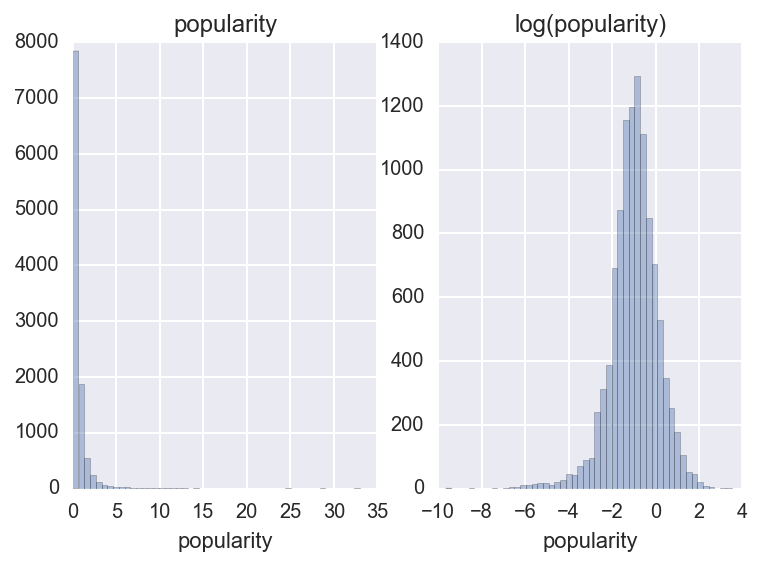

In [18]:
pop =sub_df1['popularity']
pop_log = np.log(pop)

fig,ax = plt.subplots(1,2)

sns.distplot(pop,kde=False,ax=ax[0]).set_title("popularity")
sns.distplot(pop_log,kde=False,ax=ax[1]).set_title("log(popularity)")

*The above histogram shows the distribution of raw "popularity" data is highly right-skewed, that's why I tried a log transformation. After transformation, the data formed a more normal distribution.*

**Add column for every genre, containing only 1s and 0s whether a movie is of a specific genre or not**

In [7]:
#add column for every genre, containing only 1s and 0s whether a movie is of a specific genre or not
for genre in let:
    sub_df1[genre] = sub_df1['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

sub_df1.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,popularity,genres,Mystery,Romance,History,Family,Fantasy,Horror,Crime,Drama,...,Music,Adventure,Foreign,Action,TV Movie,Comedy,Documentary,War,Thriller,Western
0,32.985763,Action|Adventure|Science Fiction|Thriller,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,28.419936,Action|Adventure|Science Fiction|Thriller,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,13.112507,Adventure|Science Fiction|Thriller,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,11.173104,Action|Adventure|Science Fiction|Fantasy,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9.335014,Action|Crime|Thriller,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Which genres are most popular from year to year? 

**Make a pie plot to show the percentage of each genre**

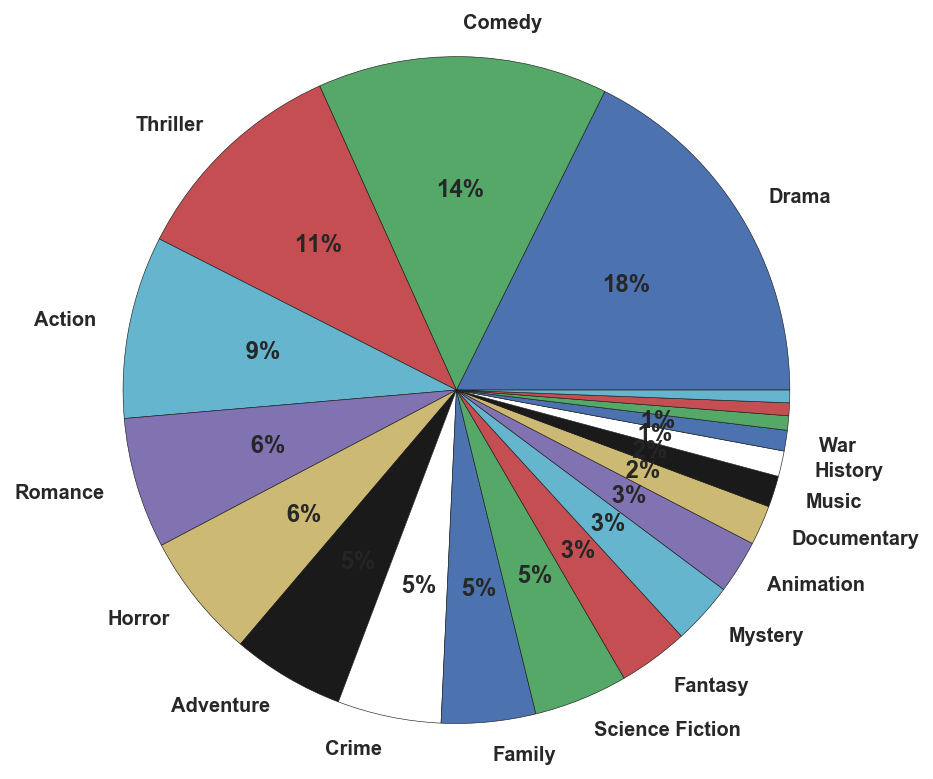

In [20]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_count = []
for genre in let:
    genre_count.append([genre, sub_df1[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

*The above pie chart clearly shows that Drama is the most one among all genres, and the genres of Drama, Comdey, Thriller and Action make up half of all movies.*

**Group the genre data and count on mean_popularity**

In [40]:
#boxplot of genres and popularity

let1 = list(let)
mean_per_genre = pd.DataFrame(let1)
#mean popularity
newArray = []*len(let1)
for genre in let:
    newArray.append(sub_df1.groupby(genre,as_index=True)['popularity'].mean())
newArray2 = []*len(let1)
for i in range(len(let1)):
    newArray2.append(newArray[i][1])
    
mean_per_genre['mean_popularity'] = newArray2
mean_per_genre

,0,mean_popularity
0,Mystery,0.690012
1,Romance,0.592082
2,History,0.575936
3,Family,0.786668
4,Fantasy,0.992840
5,Horror,0.465357
6,Crime,0.744821
7,Drama,0.591496
8,Science Fiction,1.001218
9,Animation,0.852182


**Sort the dataset and find top 5 popular genres**

In [42]:
#find top 5 popular genres
mean_per_genre.sort_values('mean_popularity',ascending=False).head()

,0,mean_popularity
11,Adventure,1.154259
8,Science Fiction,1.001218
4,Fantasy,0.992840
13,Action,0.926136
9,Animation,0.852182


### What kinds of properties are associated with movies that have high revenues?

**Plot a correlation matrix to show the correlation between numeric variables**

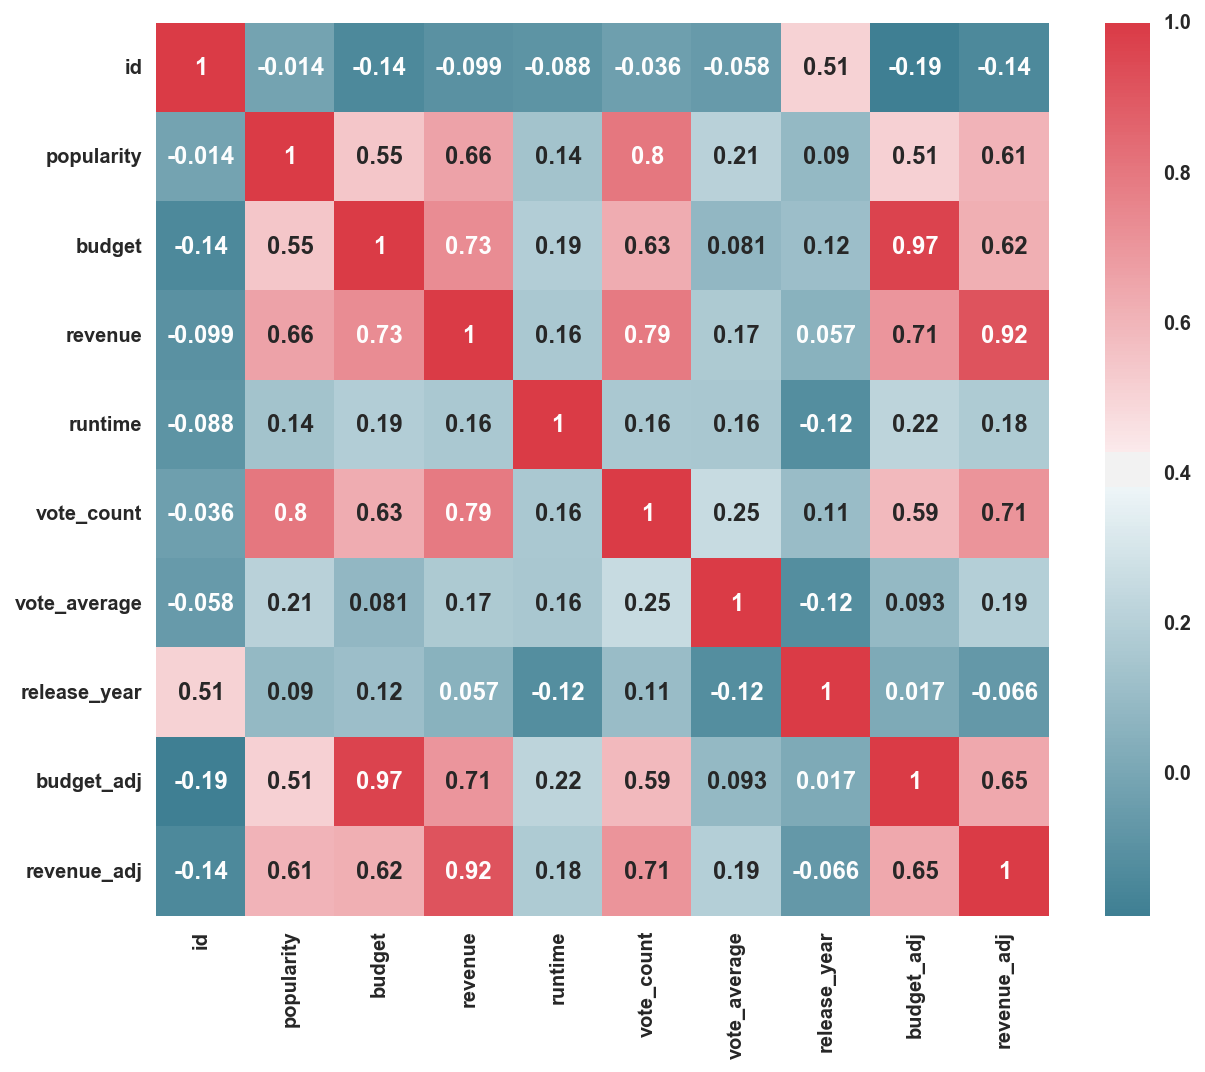

In [48]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig, ax = plt.subplots(figsize=(10,8))
corr = movie_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap=sns.diverging_palette(220, 10, as_cmap=True),
           annot = True)

*The above heatmap shows the correlation between each numeric variable. Among them,vote_count, budget and popularity have the highest correlation to revenue. Meanwhile, id, runtime, vote_average and release_year seem don't have much correlation to revenue.*

**Plot scatterplot to "revenue" and other vairables with high correlation**

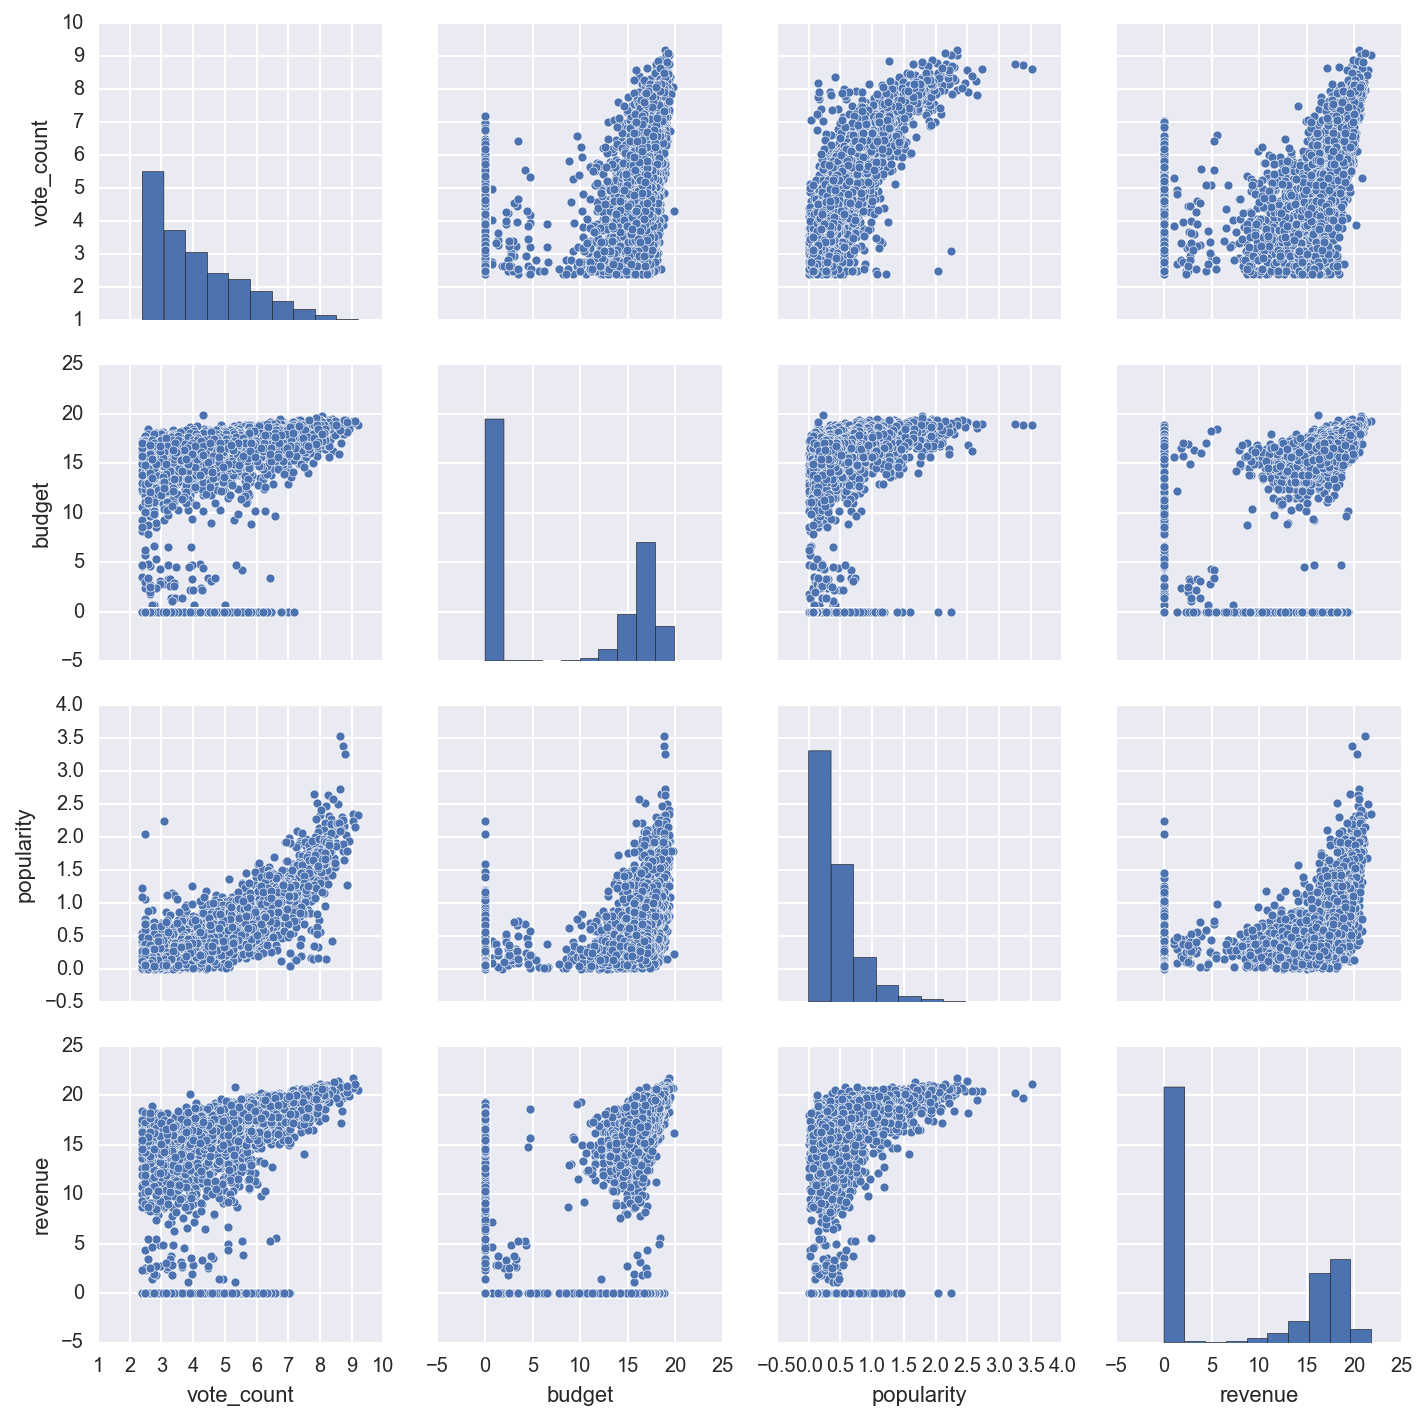

In [6]:
#check multiply variables at once
sub_revenue = movie_df[["vote_count","budget","popularity","revenue"]]
sns.pairplot(log(sub_revenue+1))

*After I got these variables with high correlation to revenue, I made paired scatterplot to further check the relation between revenue with these variables.All data are log transformed. The scatterplot shows the positive correlation patterns between these variables to revenue.  *

<a id='conclusions'></a>
## Conclusions

> After we extracted genres data from original dataset and counted the mean popularity of each genre, we can answer the first question, the top 5 popular genres are Adventure, Science Fiction, Fantasy, Action and Animation, because these genres have the most high mean popularity.

> Acutally other variables can also indicate popularity, like revenue and vote_count. To further analysis the data, we can include these variables in and make a more comprehensive conculsion.

> To answer the second question, we first checked the correlation between every numeric variables, and found vote_count, budget and popularity have the highest correlation with revenue.  Then we looked at the sub dataset with only these four variables, and made a paired scatterplot. These paires shown nice correlation. 

> In the final scatterplot, the data was log tranformed. But there were still lots of zeros in dataset, in future work, we should at first clean the data and probably get rid of these extrmedly low datapoints and outliers.